In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network12 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.015, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
from utils.learningrate_decay import step_decay, exp_decay
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network12-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

/40
663/663 [==============================] - 38s 58ms/step - loss: 0.2430 - tp: 317478.0000 - fp: 21946.0000 - tn: 317478.0000 - fn: 21946.0000 - acc: 0.0149 - precision: 0.9353 - recall: 0.9353 - auc: 0.9842 - binary_accuracy: 0.9353 - binary_crossentropy: 0.1610 - val_loss: 0.1565 - val_tp: 139639.0000 - val_fp: 5829.0000 - val_tn: 139639.0000 - val_fn: 5829.0000 - val_acc: 0.0000e+00 - val_precision: 0.9599 - val_recall: 0.9599 - val_auc: 0.9940 - val_binary_accuracy: 0.9599 - val_binary_crossentropy: 0.1048
Epoch 4/40
663/663 [==============================] - 38s 58ms/step - loss: 0.2358 - tp: 317884.0000 - fp: 21540.0000 - tn: 317884.0000 - fn: 21540.0000 - acc: 0.0140 - precision: 0.9365 - recall: 0.9365 - auc: 0.9850 - binary_accuracy: 0.9365 - binary_crossentropy: 0.1566 - val_loss: 0.1727 - val_tp: 140959.0000 - val_fp: 4509.0000 - val_tn: 140959.0000 - val_fn: 4509.0000 - val_acc: 0.0000e+00 - val_precision: 0.9690 - val_recall: 0.9690 - val_auc: 0.9943 - val_binary_accura

In [9]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

6495/6495 [==============================] - 217s 33ms/step - loss: 0.1728 - tp: 201921.0000 - fp: 5890.0000 - tn: 201921.0000 - fn: 5890.0000 - acc: 0.0000e+00 - precision: 0.9717 - recall: 0.9717 - auc: 0.9958 - binary_accuracy: 0.9717 - binary_crossentropy: 0.0775
loss :  0.1728069931268692

tp :  201921.0

fp :  5890.0

tn :  201921.0

fn :  5890.0

acc :  0.0

precision :  0.9716569185256958

recall :  0.9716569185256958

auc :  0.9958105087280273

binary_accuracy :  0.9716569185256958

binary_crossentropy :  0.07752346992492676



In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  127648.0
TruePositives result:  74273.0
FalseNegatives result:  1421.0
FalsePositives result:  4469.0
Recall result:  0.98122704
Precision result:  0.94324505


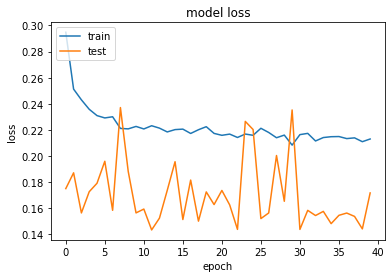

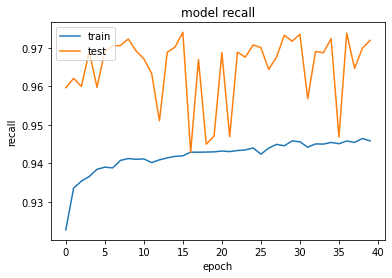

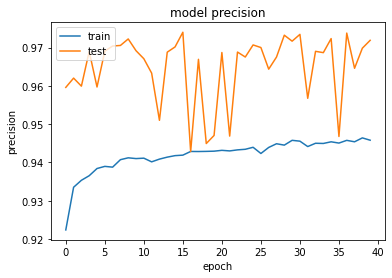

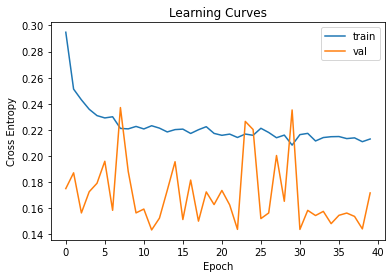

In [11]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)

In [12]:
fig.lr_graph(model_,dir_name)

KeyError: 'lr'